In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

#Reading data
data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()


(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
#collecting x and y
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [6]:
mean_X=np.mean(X)
mean_Y=np.mean(Y)

n=len(X)

numer=0
denom=0
for i in range(n):
    numer+=(X[i] - mean_X) * (Y[i] - mean_Y)
    denom+=(X[i] - mean_X) **2
b1=numer/denom
b0=mean_Y-(b1*mean_X)

print(b1,b0)

0.26342933948939945 325.57342104944223


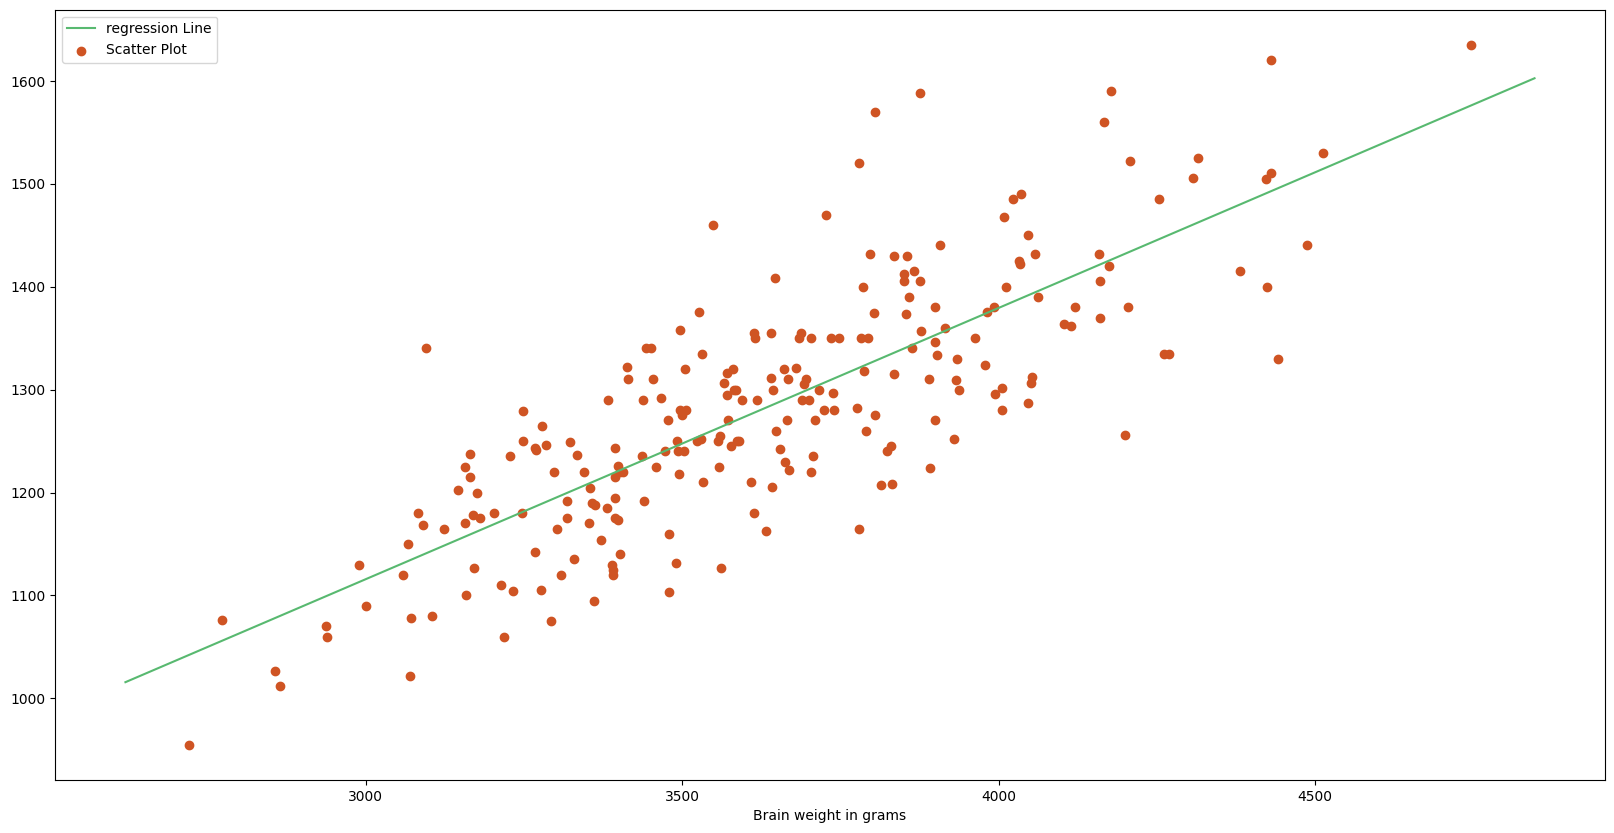

In [7]:
max_X=np.max(X)+100
min_X=np.min(X)-100

x=np.linspace(min_X,max_X, 1000)
y=b0+b1*x


plt.plot(x,y,color='#58b970', label='regression Line')
plt.scatter(X,Y,color='#cf5423', label='Scatter Plot')

plt.xlabel('head size in cms')
plt.xlabel('Brain weight in grams')
plt.legend()
plt.show()

In [8]:
#for R**2 value  method to test our model wokring

ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_Y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=X.reshape((n,1))

reg=LinearRegression()
reg=reg.fit(X,Y)

Y_pred=reg.predict(X)

r2_score = reg.score(X,Y)

print(r2_score)


0.639311719957
